In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_flat+decrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

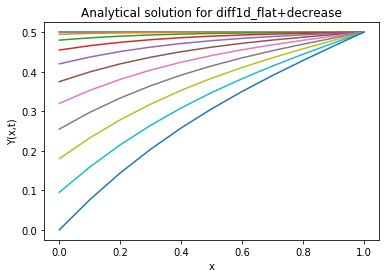

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 1650
         Function evaluations: 1753
         Gradient evaluations: 1753
5min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.9139521242555443e-05
 hess_inv: array([[ 1.01897158e+04, -3.00689281e+01,  1.40479879e+04, ...,
        -3.90510563e+02,  4.88476473e+03,  2.05467476e+03],
       [-3.00689284e+01,  3.62312207e+01, -3.77793218e+02, ...,
         3.51170677e+01,  2.95493618e+02,  1.92376505e+02],
       [ 1.40479879e+04, -3.77793218e+02,  3.52054238e+04, ...,
        -6.75081807e+03,  1.78992745e+04, -2.76041855e+03],
       ...,
       [-3.90510558e+02,  3.51170681e+01, -6.75081807e+03, ...,
         5.86176841e+03, -1.14645482e+04,  5.22978761e+03],
       [ 4.88476472e+03,  2.95493618e+02,  1.78992745e+04, ...,
        -1.14645482e+04,  4.12312782e+04, -7.47414814e+03],
       [ 2.05467476e+03,  1.92376505e+02, -2.76041854e+03, ...,
         5.22978

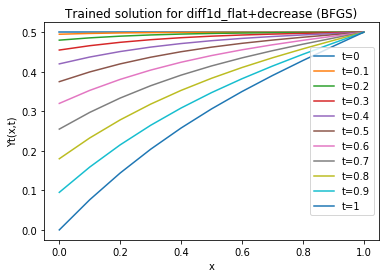

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

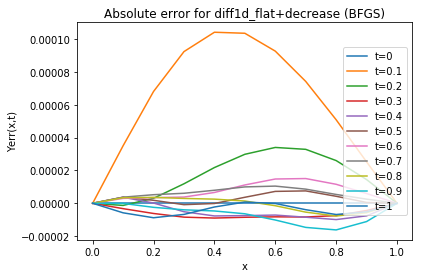

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

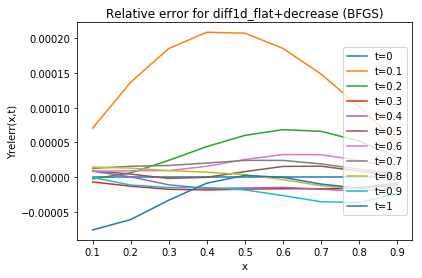

In [11]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
# Yrelerr1 = (Yt1-Ya)/Ya
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [12]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 4877
         Function evaluations: 5260
         Gradient evaluations: 5260
15min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.947212268956611e-06
 hess_inv: array([[ 1.07398476e+04,  4.34753186e+03, -6.42385577e+03, ...,
         5.17117914e+04, -3.98402024e+05,  6.24619761e+04],
       [ 4.34752923e+03,  3.94184934e+03, -3.76154603e+03, ...,
         1.79576360e+04, -2.62829468e+05,  4.42103736e+04],
       [-6.42385598e+03, -3.76154853e+03,  4.97491797e+03, ...,
        -2.32823752e+04,  3.01192453e+05, -4.88532708e+04],
       ...,
       [ 5.17117801e+04,  1.79576374e+04, -2.32823644e+04, ...,
         5.12791778e+05, -1.89126849e+06,  2.93679123e+05],
       [-3.98402233e+05, -2.62829753e+05,  3.01192590e+05, ...,
        -1.89126998e+06,  2.14171984e+07, -3.59517378e+06],
       [ 6.24620316e+04,  4.42104343e+04, -4.88533091e+04, ...,
         2.9367

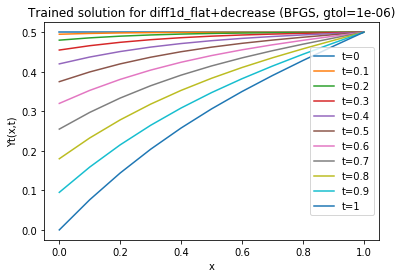

In [13]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

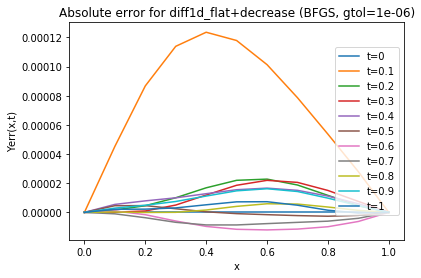

In [14]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

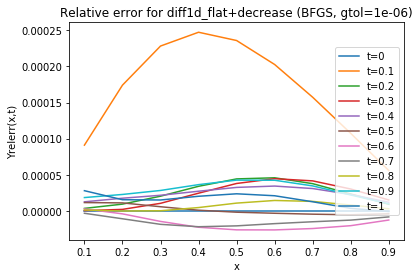

In [15]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [16]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000006
         Iterations: 8000
         Function evaluations: 8634
         Gradient evaluations: 8634
24min 46s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.434216973206913e-06
 hess_inv: array([[ 9.17788690e+03,  4.69706920e+02, -1.22795973e+04, ...,
         6.31212056e+04,  5.54841948e+05, -1.71371383e+05],
       [ 4.69710611e+02,  2.16196170e+02, -1.17939065e+03, ...,
         1.02407400e+04,  1.01826944e+05, -2.54251002e+04],
       [-1.22796072e+04, -1.17938225e+03,  1.90977191e+04, ...,
        -9.61685278e+04, -9.82019392e+05,  2.85188841e+05],
       ...,
       [ 6.31214363e+04,  1.02407505e+04, -9.61689208e+04, ...,
         9.29214713e+05,  6.22944835e+06, -1.77172023e+06],
       [ 5.54844280e+05,  1.01826459e+05, -9.82023835e+05, ...,
         6.22942571e+06,  6.96418368e+07, -1.86130341e+07],
       [-1.71372256e+05, -2.54249497e+04,  2.85190309e+05, ...,
        -1.77171558e+06, -1.86130301e+07,  5.37802241

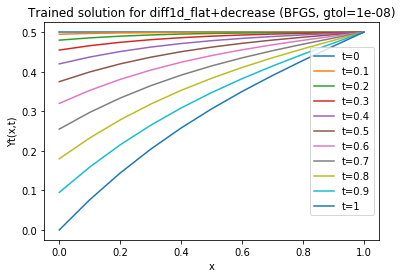

In [17]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

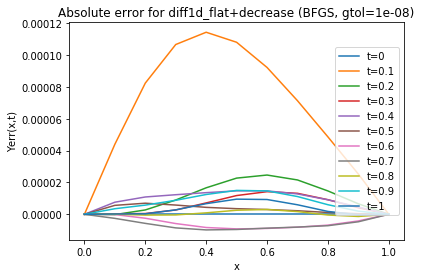

In [18]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

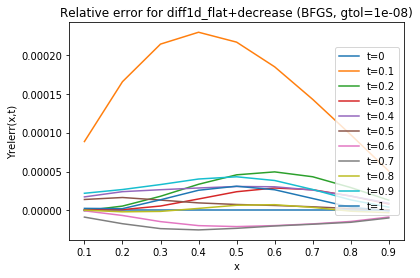

In [19]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8, maxiter=16000)

In [20]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

OverflowError: (34, 'Result too large')

In [ ]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

In [ ]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

In [ ]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));